## PyCon Namibia 2017
# Producing Pretty Plots in Python
### Geraint Ian Palmer

This notebook contains all the code used to produce the plots in the slies. There are a couple of extra advanced examples at the end of the notebook, to demonstrate how flexible matplotlib can be.

# Pyplot

In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib inline

In [3]:
random.seed(52)
data = [random.lognormvariate(0.4, 0.2) for _ in range(100)] + [random.random()*2.5 for _ in range(4)]
xs = [1, 2, 3, 4, 5]
ys = [7, 2, 3, 4, 3]

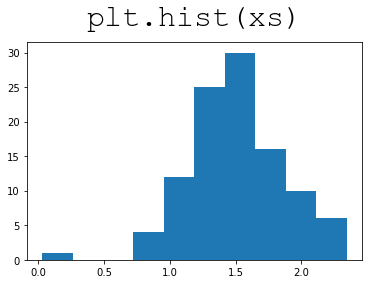

In [4]:
plt.hist(data)
plt.title('plt.hist(xs)', fontsize=30, fontname='Courier New', y=1.05)
plt.show()

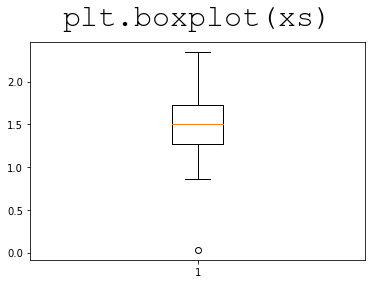

In [5]:
plt.boxplot(data)
plt.title('plt.boxplot(xs)', fontsize=30, fontname='Courier New', y=1.05)
plt.show()

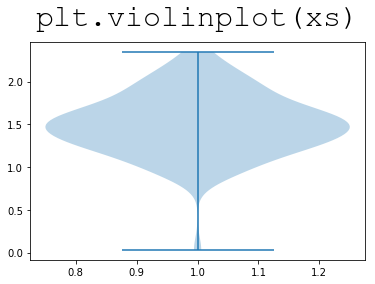

In [6]:
plt.violinplot(data)
plt.title('plt.violinplot(xs)', fontsize=30, fontname='Courier New', y=1.05)
plt.show()

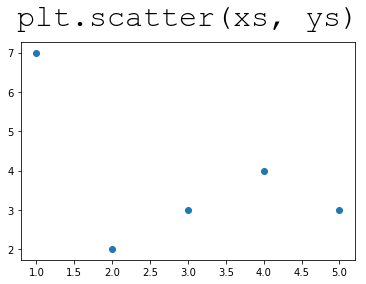

In [7]:
plt.scatter(xs, ys)
plt.title('plt.scatter(xs, ys)', fontsize=30, fontname='Courier New', y=1.05)
plt.show()

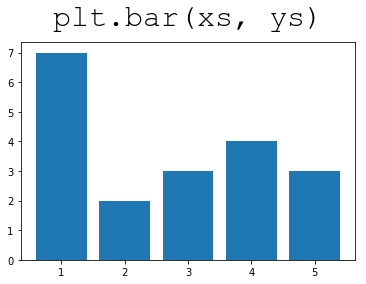

In [8]:
plt.bar(xs, ys)
plt.title('plt.bar(xs, ys)', fontsize=30, fontname='Courier New', y=1.05)
plt.show()

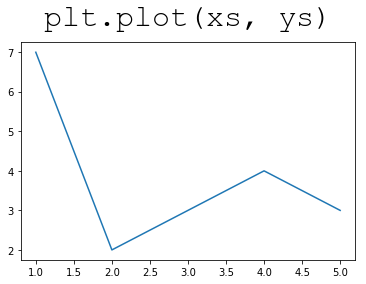

In [9]:
plt.plot(xs, ys)
plt.title('plt.plot(xs, ys)', fontsize=30, fontname='Courier New', y=1.05)
plt.show()

# Anscombe's Quartet

In [10]:
import seaborn as sns # For making plots prettier (also to load in anscombe's quartet)
sns.set_style("whitegrid")

In [11]:
df = sns.load_dataset("anscombe")

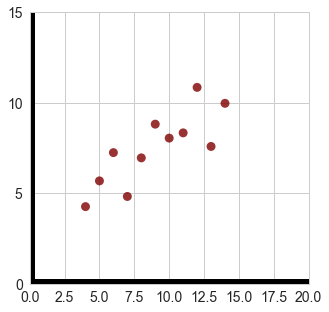

In [12]:
fig, ax = plt.subplots(1, figsize=(5, 5))
data = df[df['dataset']=='I']
ax.scatter(data['x'], data['y'], s=80, edgecolor='none', facecolor='maroon', alpha=0.8)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
ax.axhline(linewidth=10, c='black')
ax.axvline(linewidth=10, c='black')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

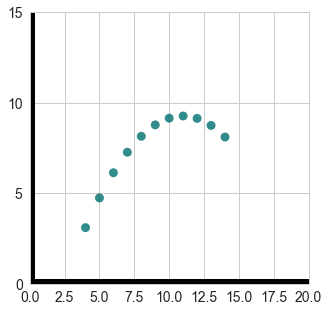

In [13]:
fig, ax = plt.subplots(1, figsize=(5, 5))
data = df[df['dataset']=='II']
ax.scatter(data['x'], data['y'], s=80, edgecolor='none', facecolor='#006F6F', alpha=0.8)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
ax.axhline(linewidth=10, c='black')
ax.axvline(linewidth=10, c='black')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

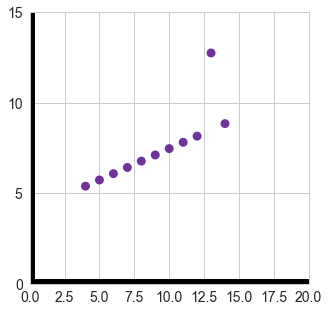

In [14]:
fig, ax = plt.subplots(1, figsize=(5, 5))
data = df[df['dataset']=='III']
ax.scatter(data['x'], data['y'], s=80, edgecolor='none', facecolor='indigo', alpha=0.8)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
ax.axhline(linewidth=10, c='black')
ax.axvline(linewidth=10, c='black')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

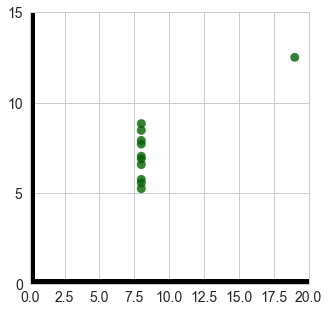

In [15]:
fig, ax = plt.subplots(1, figsize=(5, 5))
data = df[df['dataset']=='IV']
ax.scatter(data['x'], data['y'], s=80, edgecolor='none', facecolor='darkgreen', alpha=0.8)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlim([0, 20])
ax.set_ylim([0, 15])
ax.axhline(linewidth=10, c='black')
ax.axvline(linewidth=10, c='black')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# Plot Anatomy

In [16]:
import matplotlib.cm as cm # For getting a colormap without data

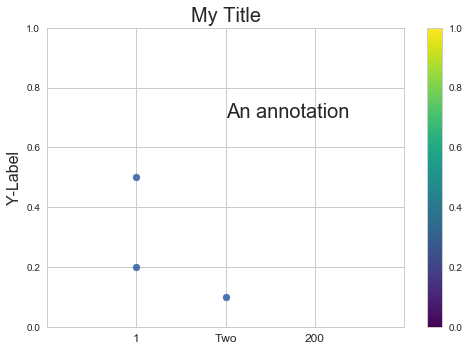

In [17]:
fig, ax = plt.subplots(1)

# Hack to get colorbar (as there is no data)
sm = cm.ScalarMappable(cmap=cm.viridis)
sm._A = []

ax.set_xticks([1, 2, 3])

ax.set_xlim(0, 4)
ax.set_ylim(0, 1)

ax.set_xticklabels([1, 'Two', 200], fontsize=12)

ax.set_ylabel('Y-Label', fontsize=16)

ax.set_title('My Title', fontsize=20)

ax.text(2, 0.7, 'An annotation', fontsize=20)

ax.scatter([1, 1, 2], [0.5, 0.2, 0.1])
fig.colorbar(sm)

plt.show()

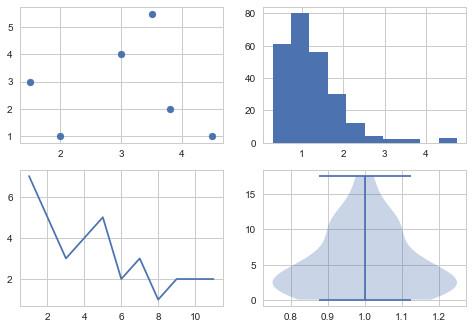

In [18]:
fig, axarr = plt.subplots(2, 2)

axarr[0, 0].scatter([1.5, 2, 3, 3.5, 3.8, 4.5], [3, 1, 4, 5.5, 2, 1])
axarr[0, 1].hist([random.lognormvariate(0.1, 0.5) for _ in range(250)])
axarr[1, 0].plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 11], [7, 5, 3, 4, 5, 2, 3, 1, 2, 2])
axarr[1, 1].violinplot([random.expovariate(0.2) for _ in range(30)])

plt.show()

# Example plots

For this section data is available in a spreadsheet [here.](datasets.xls)

In [19]:
import pandas as pd # To import and filter data
import numpy as np
import math

### Olympic Medallists Data

In [20]:
olympics = pd.read_excel("datasets.xls", sheetname="200m Women Olympics").dropna()

In [21]:
olympics = olympics[olympics.index != 3] # Remove row three (tied place) as could interfere with plotting

In [22]:
usa_x = olympics[olympics['Country']=='USA']['Year']
usa_y = olympics[olympics['Country']=='USA']['Result']
gold = olympics[olympics['Medal']=='GOLD']['Result']
silver = olympics[olympics['Medal']=='SILVER']['Result']
bronze = olympics[olympics['Medal']=='BRONZE']['Result']
dates = sorted(list(set(olympics['Year'])))

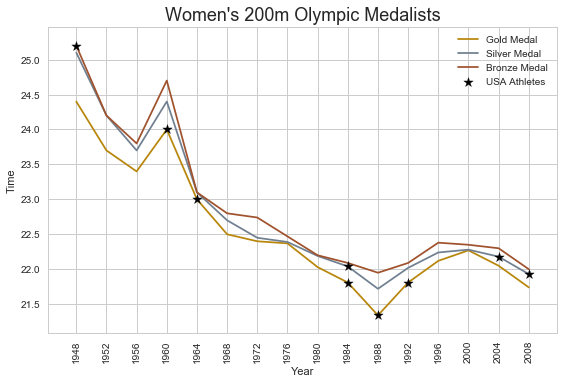

In [23]:
fig, ax = plt.subplots(1)
ax.plot(dates, gold, c='darkgoldenrod', zorder=1, label='Gold Medal')
ax.plot(dates, silver, c='slategray', zorder=1, label='Silver Medal')
ax.plot(dates, bronze, c='sienna', zorder=1, label='Bronze Medal')

ax.scatter(usa_x, usa_y,
           facecolor='black', marker='*', s=100,
           zorder=2, label='USA Athletes')

plt.legend()

ax.set_xticks(dates)
ax.set_xticklabels(dates, rotation='vertical')

ax.set_xlabel("Year")
ax.set_ylabel("Time")
ax.set_title("Women's 200m Olympic Medalists", fontsize=18)

plt.tight_layout()
plt.show()

### Heatmap Data

In [24]:
def f(x, y):
    return -(3*x**2+y**2)*math.exp(-x**2-y**2)

In [25]:
xs = np.arange(-2, 2.2, 0.1)
ys = np.arange(-2, 2.2, 0.1)

z = []
for y in ys[:-1]:
    z.append([])
    for x in xs[:-1]:
        z[-1].append(f(x, y))

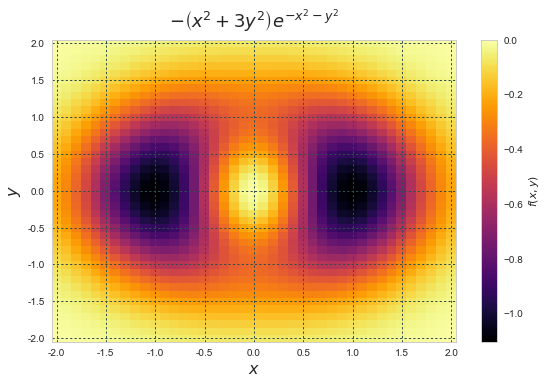

In [26]:
fig, ax = plt.subplots(1)

hm = ax.pcolor(z, cmap='inferno', zorder=0)

ticks = np.linspace(-2, 2, 9)
ax.set_xticks([i*5 + 0.5 for i in range(9)])
ax.set_yticks([i*5 + 0.5 for i in range(9)])
ax.set_xticklabels(ticks)
ax.set_yticklabels(ticks)

ax.grid(which='major', color='darkslategrey',
        linestyle=':', linewidth=1, axis='both')

cbar = fig.colorbar(hm)
cbar.set_label(r"$f(x, y)$")

ax.set_title(r"$-\left(x^2+3y^2\right)e^{-x^2-y^2}$",
             fontsize=18, y=1.02)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel(r"$y$", fontsize=16)

plt.tight_layout()
plt.show()

### Titanic Survival Data

In [27]:
titanic = pd.read_excel("datasets.xls", sheetname="Titanic").dropna()

In [28]:
male_survived = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,1,'male']
male_died = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,0,'male']
female_survived = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,1,'female']
female_died = titanic.groupby(["PClass", "Survived"])['Sex'].value_counts()[:,0,'female']

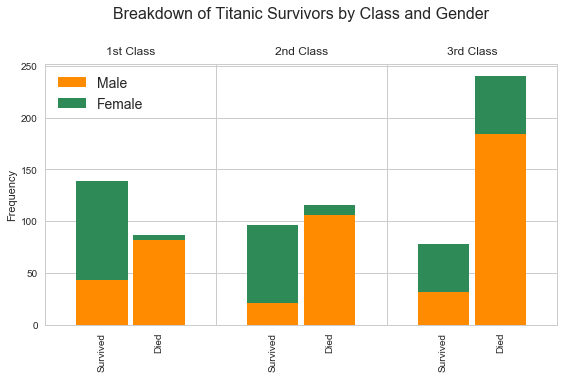

In [29]:
fig, ax = plt.subplots(1)

ax.bar([1, 4, 7], male_survived,
       width=0.9, color='darkorange', label='Male')
ax.bar([2, 5, 8], male_died,
       width=0.9, color='darkorange')
ax.bar([1, 4, 7], female_survived,
       width=0.9, color='seagreen', bottom=male_survived,
      label='Female')
ax.bar([2, 5, 8], female_died,
       width=0.9, color='seagreen', bottom=male_died)

ax.set_xlim(0, 9)
plt.xticks([1, 2, 4, 5, 7, 8],
           ['Survived', 'Died']*3, rotation='vertical')
ax.set_xticks([3, 6], minor=True)
ax.xaxis.grid(False, which='major')
ax.xaxis.grid(True, which='minor')
ax2 = ax.twiny()

plt.sca(ax2)
plt.xticks([1.5, 4.5, 7.5],
           ["1st Class", "2nd Class", "3rd Class"], fontsize=12)
ax2.set_xlim(0, 9)
ax2.xaxis.grid(False, which='both')

ax.legend(loc=0, fontsize=14)
ax.set_ylabel("Frequency")
ax.set_title("Breakdown of Titanic Survivors by Class and Gender",
              fontsize=16, y=1.15)
plt.tight_layout()

plt.show()

### New York Singers Data

In [30]:
singers = pd.read_excel("datasets.xls", sheetname="Singers").dropna()
singers['voice'] = singers['voice'].apply(lambda x: x[:-2]) # Combine Bass 1 & 2, etc.

In [31]:
voices = ['Bass', 'Tenor', 'Alto', 'Soprano']
heights = [list(singers[singers['voice']==v]['height']) for v in voices]

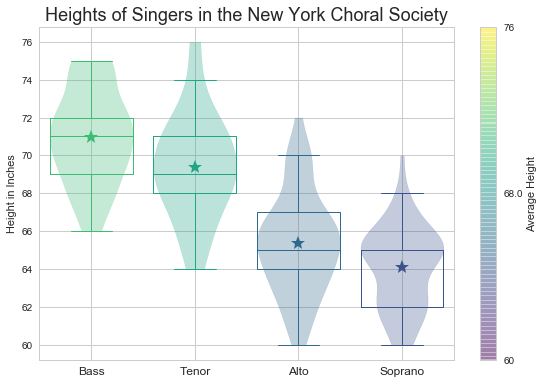

In [32]:
fig, ax = plt.subplots(1)

# Hack to get colorbar (as we dont have a mappable, we are applying colour directly to the boxplots)
sm = plt.cm.ScalarMappable(cmap=cm.viridis)
sm._A = []


maxy = max([max(data) for data in heights])
miny = min([min(data) for data in heights])


for i, data in enumerate(heights):
    plot_colour = cm.viridis((np.mean(data)-miny)/(maxy-miny))
    meanpointprops = dict(marker='*',markeredgecolor=plot_colour,
                          markerfacecolor=plot_colour, markersize=15)
    bp = ax.boxplot(data, positions=[i+0.5], widths=0.8, meanprops=meanpointprops,
                    showmeans=True)
    vp = ax.violinplot(data, positions=[i+0.5], widths=0.8,
                       showmeans=False, showextrema=False, showmedians=False)
    plt.setp(bp['boxes'], color=plot_colour)
    plt.setp(bp['whiskers'], color=plot_colour)
    plt.setp(bp['medians'], color=plot_colour)
    plt.setp(bp['fliers'], color=plot_colour)
    plt.setp(bp['caps'], color=plot_colour)
    plt.setp(vp['bodies'], color=plot_colour)


ax.set_xticks([i+0.5 for i in range(4)])
ax.set_xticklabels(voices, fontsize=12)

ax.set_ylabel("Height in Inches")
ax.set_title("Heights of Singers in the New York Choral Society",
             fontsize=18)
ax.set_xlim(0, 4)

cbar = fig.colorbar(sm, alpha=0.3)
cbarzero = ((maxy - miny)/2)+miny
cbar.set_ticks([0, 0.5, 1])
cbar.ax.set_yticklabels([miny, cbarzero, maxy])
cbar.set_label("Average Height")

plt.tight_layout()
plt.show()